In [ ]:
pip install -U decorator --user

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.


In [ ]:
pip show decorator

Name: decorator
Version: 5.1.1
Summary: Decorators for Humans
Home-page: https://github.com/micheles/decorator
Author: Michele Simionato
Author-email: michele.simionato@gmail.com
License: new BSD License
Location: /root/.local/lib/python3.10/site-packages
Requires: 
Required-by: gcsfs, ipyparallel, ipython, librosa, moviepy, ratelim, tensorflow-probability


Greedy best first search

A -> E -> F -> I
Goal reached
S -> B -> F -> G
Goal reached


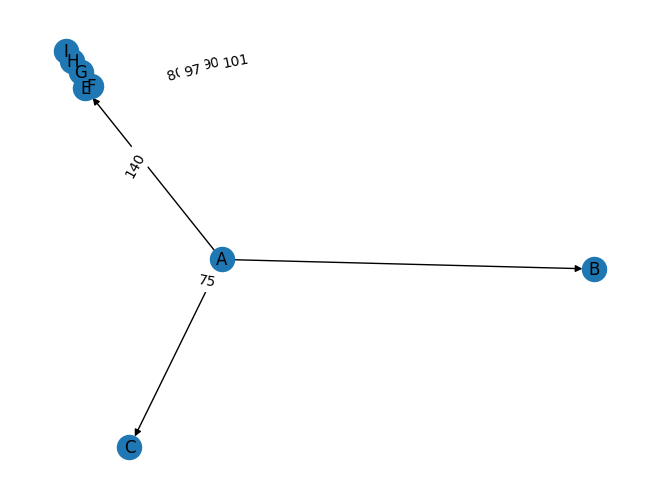

In [ ]:
frontier=[]
explored=[]
ans=[]
def greedy_best_first_search(nodes,edges,H,adj,initial_node,goal_node):
  global frontier
  global explored
  global ans
   #initial_node = nodes[0] # assuming first node is source node
    #goal_node = nodes[-1] # assuming last node is goal_node


  frontier.append((H[initial_node],initial_node))
  if(initial_node == goal_node):
      print(goal_node)
      return True

  while(frontier):
      frontier.sort(key=lambda x:x[0]) # sorting frontier w.r.t heuristic values
      #print(frontier)
      node = frontier.pop(0)
      ans.append(node[-1])
      if node in explored:
          continue

      explored.append(node)
      if node[-1] == goal_node:
         print(' -> '.join(ans))
         return True
      frontier = []
      #print(node[-1])
      for i in adj[node[-1]]:
          if i not in explored:
             frontier.append((H[i[-1]],i[-1]))
  return False


#######################################################
nodes = ['A','B','C','E','F','G','H','I']
edges = [('A','C',118),('A','E',140),('A','B',75),('E','G',80),('E','F',90),('F','I',211),('G','H',97),('H','I',101)]
H = dict([('A',366), ('B',374), ('C',329), ('D',244),('E',253),('F',178), ('G',193), ('H',98),('I',0)])
adj = {
    'A':[(118,'C'),(75,'B'),(140,'E')],
    'B':[],
    'C':[],
    'E':[(90,'F'),(80,'G')],
    'F':[(211,'I')],
    'G':[(97,'H')],
    'H':[(101,'I')],
    'I':[]
}
import networkx as nx
G1 = nx.DiGraph()
G1.add_nodes_from(nodes)
G1.add_weighted_edges_from(edges)
weight = nx.get_edge_attributes(G1, 'weight')
nx.draw(G1, pos=nx.spring_layout(G1), with_labels = True)
nx.draw_networkx_edge_labels(G1,pos=nx.spring_layout(G1),edge_labels = weight)

#####################################################################
if greedy_best_first_search(nodes,edges,H,adj,nodes[0],nodes[-1]):
    print('Goal reached')
else:
    print("Goal not reached")

######################################################################
ans = []
nodes = ['S','A','B','C','E','F','H','I','G']
edges = [('S','A',3),('S','B',2),('A','C',4),('A','D',1),('B','E',3),('B','F',1),('E','H',5),('F','I',2),('F','G',3)]
H = dict([('A',12), ('B',4), ('C',7), ('D',3),('E',8),('F',2), ('G',0), ('H',4),('I',9),('S',13)])
adj = {
    'S':[(3,'A'),(2,'B')],
    'A':[(4,'C'),(1,'D')],
    'B':[(3,'E'),(1,'F')],
    'C':[],
    'D':[],
    'E':[(5,'H')],
    'F':[(2,'I'),(3,'G')],
    'G':[],
    'H':[],
    'I':[]
}

####################################################################
if greedy_best_first_search(nodes,edges,H,adj,'S','G'):
    print('Goal reached')
else:
    print("Goal not reached")
